In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from string import ascii_letters
import numpy as np
import seaborn as sns

import plotly.express as px
import ee
import geemap
from shapely.geometry import shape

/local/scr/aekastning/TMPDIR/ipykernel_2480510/1608547243.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
select_cols = [ 'long', 'lat','HYBAS_ID','geometry']

sheds = pd.read_csv("/sciclone/home/aekastning/watersheds/shedventory_2_0/data/shedventory_v2.csv", usecols=select_cols)

In [3]:
green = pd.read_csv('/sciclone/home/aekastning/pycogss_recipes/spectral-change-detector/inverse_greening_sheds.csv')

sheds = pd.merge(green, sheds, on = 'HYBAS_ID')

geodataframe

In [4]:
sheds['points'] = gpd.points_from_xy(sheds.long, sheds.lat)

points_gdf = gpd.GeoDataFrame(sheds, geometry='points', crs='epsg:4326')

/local/scr/aekastning/TMPDIR/ipykernel_2480510/157845851.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ERROR 1: PROJ: proj_create_from_database: Open of /sciclone/home/aekastning/.conda/envs/gee/share/proj failed


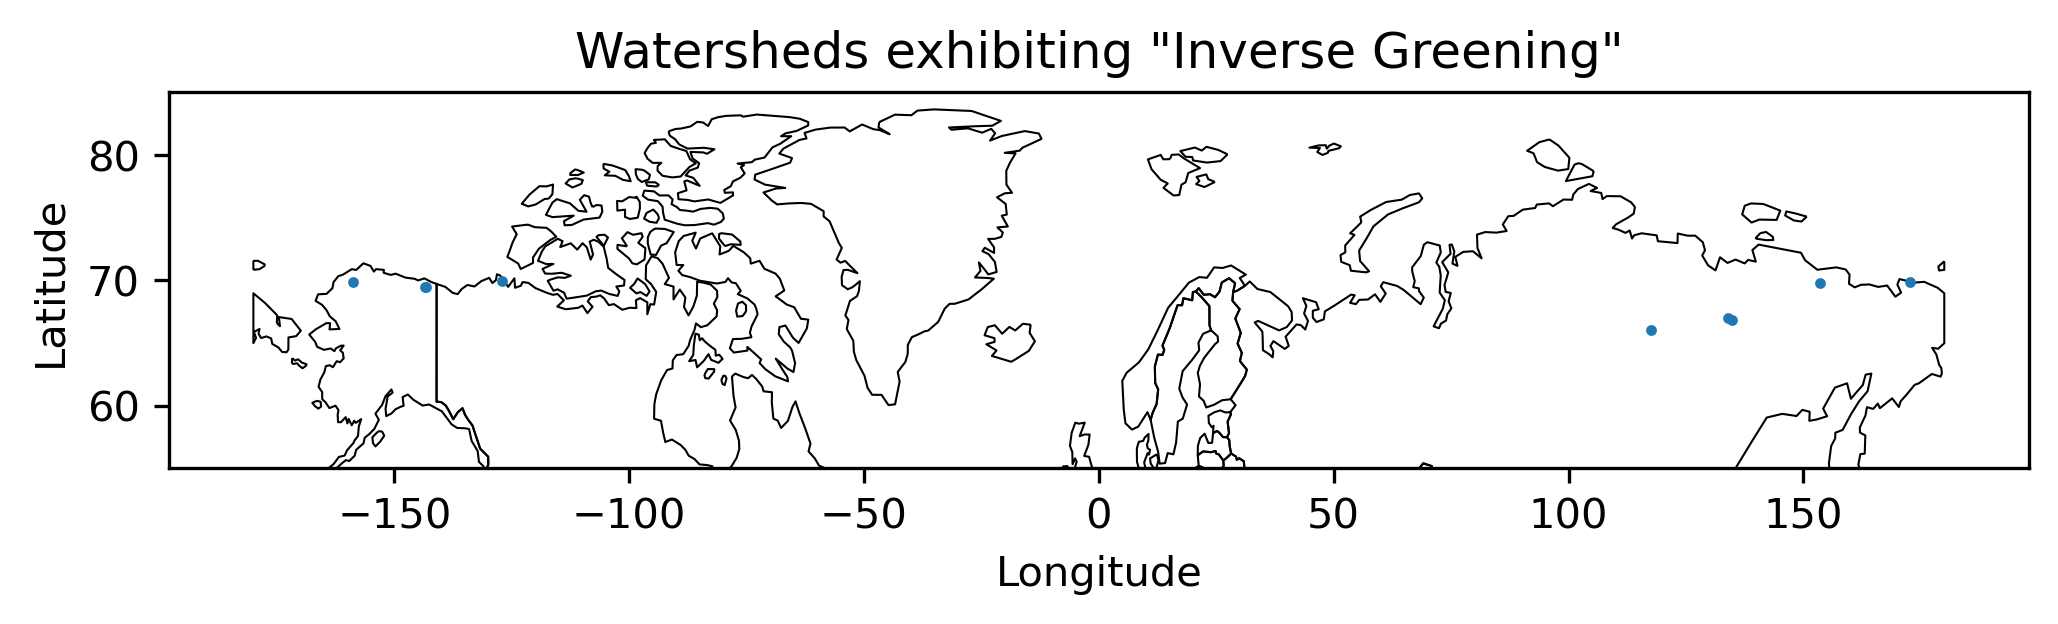

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize = (8,6), dpi = 300)

world.boundary.plot(color = 'k', edgecolor='black', zorder = 0, ax=ax, linewidth = 0.5)


points_gdf.plot(ax=ax, 
                        # column='pct_wts', 
                        # cmap='jet_r', 
                        figsize=(20, 10), 
                        markersize=2.5,
                        # legend=True, 
                        # legend_kwds={"label": "Percent Water Tracks", "orientation": "horizontal"}, 
                        vmax=1.0, 
                        zorder=1)

ax.set_ylim(55,85)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Watersheds exhibiting "Inverse Greening"')

plt.show()